## 표본 통계량 성질

### 라이브러리 임포트

#### 수치 계산에 사용하는 라이브러리

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

#### 그래프를 그리기 위한 라이브러리

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

#### 표시 자릿수 지정

In [3]:
%precision 3

'%.3f'

#### 그래프를 주피터 노트북에 그리기 위한 설정

In [4]:
%matplotlib inline

### 표본평균을 여러번 계산하기

In [5]:
population = stats.norm(loc = 4, scale = 0.8)

In [6]:
sample_mean_array = np.zeros(10000)

In [7]:
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_mean_array[i] = sp.mean(sample)

<ipython-input-7-9b90eedf5808>:4: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i] = sp.mean(sample)


In [8]:
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

### 표본평균의 평균값은 모평균에 가깝다

In [9]:
sp.mean(sample_mean_array)

<ipython-input-9-cede0e2d07e0>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(sample_mean_array)


4.004202422791747

In [10]:
sp.std(sample_mean_array, ddof = 1)

<ipython-input-10-16eb8a69a855>:1: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sp.std(sample_mean_array, ddof = 1)


0.2513580850860402

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

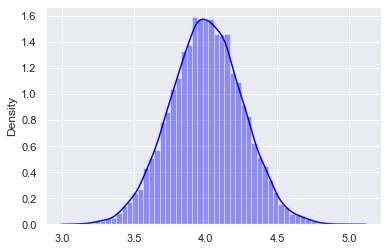

In [11]:
sns.distplot(sample_mean_array, color = 'blue')

### 샘플사이즈가 크면 표본평균은 모평균에 가까워진다.

In [12]:
size_array =  np.arange(start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [13]:
sample_mean_array_size = np.zeros(len(size_array))

In [14]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

<ipython-input-14-ade25ad4931b>:4: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array_size[i] = sp.mean(sample)


Text(0, 0.5, 'sample mean')

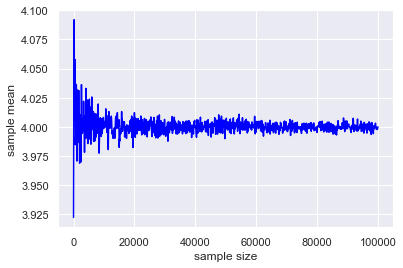

In [16]:
plt.plot(size_array, sample_mean_array_size, color = 'blue')
plt.xlabel("sample size")
plt.ylabel("sample mean")

### 표본평균을 몇 번이고 계산하는 함수 만들기

In [17]:
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = sp.mean(sample)
    return(sample_mean_array)

#### 같은 결과 값

In [19]:
np.random.seed(1)
print(sp.mean(calc_sample_mean(size = 10, n_trial = 10000)))
print(sp.mean(sample_mean_array))

<ipython-input-17-b6daeccf065b>:5: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i] = sp.mean(sample)


4.004202422791747
4.004202422791747


<ipython-input-19-f10a03e204e9>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print(sp.mean(calc_sample_mean(size = 10, n_trial = 10000)))
<ipython-input-19-f10a03e204e9>:3: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print(sp.mean(sample_mean_array))


### 샘플사이즈를 바꿨을 때 표본평균의 분산

In [20]:
np.random.seed(1)

#### 샘플사이즈 10

In [21]:
size_10 = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({"sample_mean":size_10,"size":np.tile("size 10", 10000)})

<ipython-input-17-b6daeccf065b>:5: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i] = sp.mean(sample)


#### 샘플사이즈 20

In [22]:
size_20 = calc_sample_mean(size = 20, n_trial = 10000)
size_20_df = pd.DataFrame({"sample_mean":size_20,"size":np.tile("size 20", 10000)})

<ipython-input-17-b6daeccf065b>:5: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i] = sp.mean(sample)


#### 샘플사이즈 30

In [23]:
size_30 = calc_sample_mean(size = 30, n_trial = 10000)
size_30_df = pd.DataFrame({"sample_mean":size_30,"size":np.tile("size 30", 10000)})

<ipython-input-17-b6daeccf065b>:5: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i] = sp.mean(sample)


#### 종합

In [24]:
sim_result = pd.concat([size_10_df, size_20_df, size_30_df])

#### 결과 표시

In [26]:
sim_result.head()

,sample_mean,size
0,3.922287,size 10
1,3.864329,size 10
2,4.069530,size 10
3,3.857140,size 10
4,4.184654,size 10


In [27]:
sim_result.tail()

,sample_mean,size
9995,3.980022,size 30
9996,3.770016,size 30
9997,3.930151,size 30
9998,4.075567,size 30
9999,3.976259,size 30


<AxesSubplot:xlabel='size', ylabel='sample_mean'>

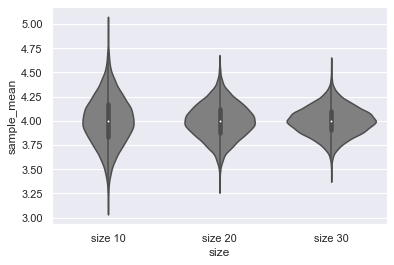

In [38]:
sns.violinplot(x = "size", y = "sample_mean", data = sim_result, color = 'gray')

#### 표본평균의 표준편차는 모집단보다 작다

In [33]:
size_array =  np.arange(start = 2, stop = 102, step = 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [34]:
sample_mean_std_array = np.zeros(len(size_array))

In [35]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size =size_array[i], n_trial = 100)
    sample_mean_std_array[i] = sp.std(sample_mean, ddof = 1)

<ipython-input-17-b6daeccf065b>:5: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i] = sp.mean(sample)
<ipython-input-35-e11636455eeb>:4: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sample_mean_std_array[i] = sp.std(sample_mean, ddof = 1)


Text(0, 0.5, 'mean_std value')

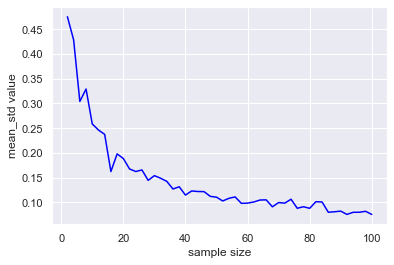

In [36]:
plt.plot(size_array, sample_mean_std_array, color = 'blue')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 표준오차

In [39]:
standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0, 0.5, 'mean_std value')

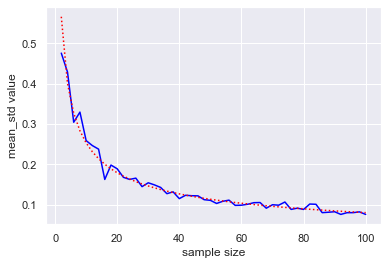

In [41]:
plt.plot(size_array, sample_mean_std_array, color = 'blue')
plt.plot(size_array, standard_error, color = 'red', linestyle = 'dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 표본분산의 평균값은 모분산과 차이가 있다.

In [42]:
sample_var_array = np.zeros(10000)

In [43]:
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_var_array[i] = sp.var(sample, ddof = 0)

<ipython-input-43-1d5280a66b1a>:4: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sample_var_array[i] = sp.var(sample, ddof = 0)


In [44]:
sp.mean(sample_var_array)

<ipython-input-44-53cba9c2cbf2>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(sample_var_array)


0.5746886877332101

### 불편분산을 사용하면 편향이 사라진다.

#### 표본 분산과 불편 분산
https://shlee1990.tistory.com/741

In [49]:
from IPython.display import Image

#### 표본 분산을 구하는 식

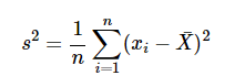

In [50]:
Image("img/sample_var.png")

#### 불편 분산을 구하는 식

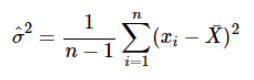

In [51]:
Image("img/unbiased_var.png")

#### 불편분산을 저장하는 변수

In [45]:
unbias_var_array = np.zeros(10000)

#### 데이터를 10개 골라서 불편분산을 구하는 시행을 10000번 반복

In [46]:
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    unbias_var_array[i] = sp.var(sample, ddof = 1)

<ipython-input-46-2e035c8d52c7>:4: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  unbias_var_array[i] = sp.var(sample, ddof = 1)


In [47]:
sp.mean(unbias_var_array)

<ipython-input-47-5f2f6b83f550>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(unbias_var_array)


0.6385429863702334

### 샘플사이즈가 크면 불편분산은 모분산에 가까워진다.

In [52]:
size_array =  np.arange(start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [53]:
unbias_var_array_size = np.zeros(len(size_array))

In [54]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = sp.var(sample, ddof = 1)

<ipython-input-54-4f3c7a35cc3d>:4: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  unbias_var_array_size[i] = sp.var(sample, ddof = 1)


Text(0, 0.5, 'unbias var')

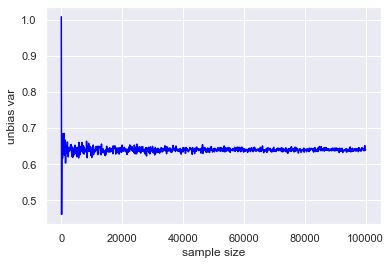

In [55]:
plt.plot(size_array, unbias_var_array_size,color = 'blue')
plt.xlabel("sample size")
plt.ylabel("unbias var")

### 불편성

#### 추정량의 기댓값이 진짜 모수(모집단의 파라미터)가 되는 특성

### 일치성

#### 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성

### 모수에 대해 좋은 추정량

표본 평균의 평균값은 모평균과 거의 같고,
불편분산의 평균값은 모분산과 거의 같다.
#### -> 표본평균과 불편분산은 둘다 불편성(편향되지 않은 성질)을 가진다.

### 큰수의 법칙

#### 표본의 크기가 커지면 표본평균이 모평균에 가까워지는 것을 의미

### 중심극한정리

#### 모집단분포가 무엇이든 샘플사이즈가 커지면 확률변수의 합은 정규분포에 가까워진다.

#### 샘플사이즈와 시행횟수

In [56]:
n_size  = 10000
n_trial = 50000

#### 앞면이면 1, 뒷면이면 0으로 표시

In [57]:
coin = np.array([0,1])

#### 앞면이 나온 횟수

In [59]:
count_coin = np.zeros(n_trial)

#### 동전을 n_size번 던지는 시행을 n_trial번 수행

In [60]:
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = sp.sum(np.random.choice(coin, size = n_size,replace = True))

<ipython-input-60-c82c6c9b383b>:3: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  count_coin[i] = sp.sum(np.random.choice(coin, size = n_size,replace = True))


#### 히스토그램 그리기

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

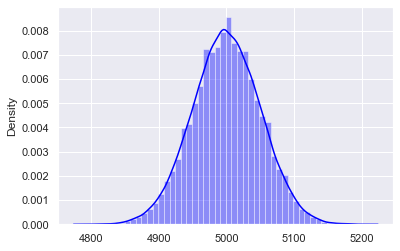

In [61]:
sns.distplot(count_coin, color = 'blue')

## 정규분포와 응용

### 라이브러리 임포트

In [62]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%precision 3
%matplotlib inline

### 확률밀도

In [63]:
sp.pi

3.142

In [64]:
sp.exp(1)

<ipython-input-64-b0fa15661482>:1: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sp.exp(1)


2.718281828459045

In [65]:
x = 3
mu = 4
sigma = 0.8
1 / (sp.sqrt(2 * sp.pi * sigma**2)) * \
    sp.exp(- ((x - mu)**2) / (2 * sigma**2))

<ipython-input-65-4d9d217e5da6>:4: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  1 / (sp.sqrt(2 * sp.pi * sigma**2)) * \
<ipython-input-65-4d9d217e5da6>:5: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sp.exp(- ((x - mu)**2) / (2 * sigma**2))


0.22831135673627742

In [66]:
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.2283113567362774

In [67]:
norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x = 3)

0.2283113567362774

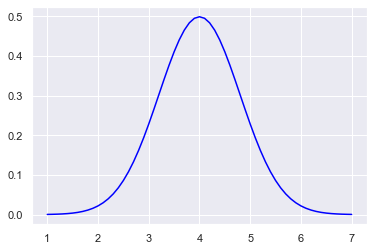

In [68]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(
    x_plot, 
    stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
    color = 'blue'
)

### 표본이 어떤 값 이하가 되는 비율

In [69]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [70]:
sp.sum(simulated_sample <= 3)

<ipython-input-70-fcdb06c12afa>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(simulated_sample <= 3)


10371

In [71]:
sp.sum(simulated_sample <= 3) / len(simulated_sample)

<ipython-input-71-b9a3967d5f08>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(simulated_sample <= 3) / len(simulated_sample)


0.10371

### 누적분포함수

#### 확률변수 X에 대해 x가 실수라고 했을때 F(X) = P(X <= x)와 같이 되는 F(X)를 누적분포함수 또는 분포함수

#### cdf : Cumulative Distribution Function

In [72]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.10564977366685535

In [73]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.5

### 하측확률과 퍼센트포인트

#### 데이터가 어떤 값 이하가 될 확률 : 하측확률

#### 어떤 확률이 될 기준치 : 퍼센트 포인트

In [74]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.4320288123679563

In [75]:
sitagawa = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
stats.norm.ppf(loc = 4, scale = 0.8, q = sitagawa)

3.0000000000000004

In [76]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.0

### 표준정규분포

#### 평균 0, 분산(표준편차) 1인 정규분포

### t값

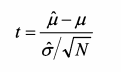

In [77]:
Image("img/t_function.png")

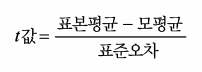

In [78]:
Image("img/t_value.png")

### t값의 표본분포

#### 난수 시드 설정

In [79]:
np.random.seed(1)

#### t값을 저장할 변수 설정

In [80]:
t_value_array = np.zeros(10000)

#### 정규분포 클래스의 인스턴스

In [81]:
norm_dist = stats.norm(loc = 4, scale = 0.8)

#### 시뷸레이션 실행

In [82]:
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

<ipython-input-82-cdb68e836abf>:3: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean = sp.mean(sample)
<ipython-input-82-cdb68e836abf>:4: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sample_std = sp.std(sample, ddof = 1)
<ipython-input-82-cdb68e836abf>:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sample_se = sample_std / sp.sqrt(len(sample))


#### t값의 히스토그램

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

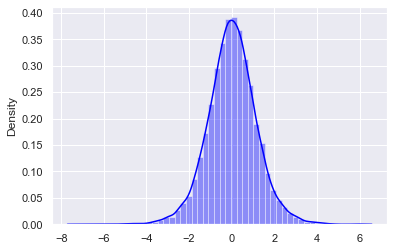

In [83]:
sns.distplot(t_value_array, color = 'blue')

#### 표준정규분포의 확률밀도

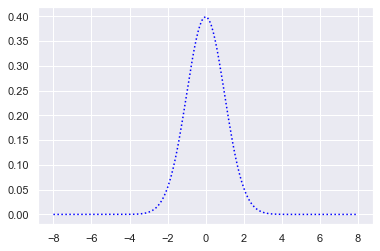

In [85]:
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x), 
         color = 'blue', linestyle = 'dotted')

### t분포

#### 모집단분포가 정규분포일 때 t값의 표본분포

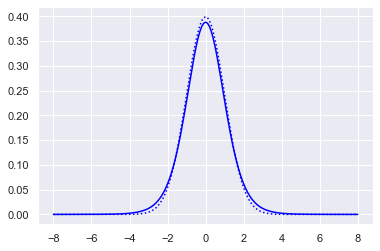

In [86]:
plt.plot(x, stats.norm.pdf(x = x), color = 'blue', linestyle = 'dotted')
plt.plot(x, stats.t.pdf(x = x, df = 9), color = 'blue')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


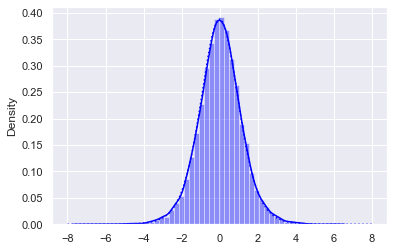

In [87]:
sns.distplot(t_value_array, color = 'blue', norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9), color = 'blue', linestyle = 'dotted')

#### ** 모분산을 모르는 상황에서도 표본평균의 분포에 대해 얘기할 수 있다.

### 분석 준비

In [89]:
fish = pd.read_csv("dataset/3-7-1-fish_length.csv")["length"]
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

### 점추정

#### 모수를 어느 1개의 값으로 추정하는 추정 방법

In [90]:
mu = sp.mean(fish)
mu

<ipython-input-90-4537d6a3112a>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mu = sp.mean(fish)


4.187

In [91]:
sigma_2 = sp.var(fish, ddof = 1)
sigma_2

<ipython-input-91-1b88a2f31d17>:1: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sigma_2 = sp.var(fish, ddof = 1)


0.680

### 구간 추정

#### 추정값이 폭을 가지게 하는 추정 방법

### 신뢰계수와 신뢰구간

#### 신뢰계수 : 구간추정의 폭에 대한 신뢰정도를 확률로 표현한 것

#### 신뢰구간 : 특정 신뢰계수를 만족하는 구간

### 신뢰한계

#### 신뢰구간의 하한값과 상한값

### 신뢰구간 계산 방법

#### 구간 추정을 할 때는 t분포의 퍼센트포인트를 사용
ex) 신뢰계수 95% , t분포를 따름 -> 2.5%와 97.5%지점을 계산

### 구간추정 (실습)

In [92]:
df = len(fish) - 1
df

9

In [100]:
sigma = sp.std(fish, ddof = 1)
se = sigma / sp.sqrt(len(fish))
se # 표준 오차

<ipython-input-100-48d432cefd4e>:1: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sigma = sp.std(fish, ddof = 1)
<ipython-input-100-48d432cefd4e>:2: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  se = sigma / sp.sqrt(len(fish))


0.2608259396768776

In [97]:
interval = stats.t.interval(
    alpha = 0.95, df = df, loc = mu, scale = se)
interval

(3.597010056835825, 4.777068592173221)

### 신뢰구간을 구하는 방법 상세 설명

In [95]:
t_975 = stats.t.ppf(q = 0.975, df = df)
t_975

2.2621571627409915

In [98]:
lower = mu - t_975 * se
lower

3.597010056835825

In [99]:
upper = mu + t_975 * se
upper

4.777068592173221

### 신뢰구간의 폭을 결정하는 요소

In [102]:
se2 = (sigma*10) / sp.sqrt(len(fish))
stats.t.interval(alpha = 0.95, df = df, loc = mu, scale = se2)

<ipython-input-102-c32ccb1e304d>:1: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  se2 = (sigma*10) / sp.sqrt(len(fish))


(-1.7132533521824618, 10.087332001191509)

In [103]:
df2 = (len(fish)*10) - 1
se3 = sigma / sp.sqrt(len(fish)*10)
stats.t.interval(alpha = 0.95, df = df2, loc = mu, scale = se3)

<ipython-input-103-c5e4eadca47e>:2: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  se3 = sigma / sp.sqrt(len(fish)*10)


(4.0233803082774395, 4.350698340731607)

In [104]:
stats.t.interval(alpha = 0.99, df = df, loc = mu, scale = se)

(3.3393979149413977, 5.034680734067649)

### 구간추정 결과의 해석

In [105]:
be_included_array = np.zeros(20000, dtype = "bool")
be_included_array

array([False, False, False, ..., False, False, False])

#### 95% 신뢰구간을 구하는 시행을 20000번 반복
#### 신뢰구간이 모평균(4)을 포함하면 True

In [106]:
np.random.seed(1)
norm_dist = stats.norm(loc = 4, scale = 0.8)
for i in range(0, 20000):
    sample = norm_dist.rvs(size = 10)
    df = len(sample) - 1
    mu = sp.mean(sample)
    std = sp.std(sample, ddof = 1)
    se = std / sp.sqrt(len(sample))
    interval = stats.t.interval(0.95, df, mu, se)
    if(interval[0] <= 4 and interval[1] >= 4):
        be_included_array[i] = True

<ipython-input-106-598414841410>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mu = sp.mean(sample)
<ipython-input-106-598414841410>:7: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  std = sp.std(sample, ddof = 1)
<ipython-input-106-598414841410>:8: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  se = std / sp.sqrt(len(sample))


In [107]:
sum(be_included_array) / len(be_included_array)

0.948

## 통계적 가설검정

#### 표본을 사용해서 모집단에 관한 통계적인 판단을 내리는 방법

### 1변량 데이터의 t검정

대상 : 평균값

판단하는 것 : 평균값이 어떤값과 다른지 얘기할 수 있는지 여부

### 통계적 가설검정의 틀 : 귀무가설, 대립가설

#### 기각되는 첫 번째 가설 : 귀무가설
#### 귀무가설과 대립되는 가설 : 대립가설

귀무가설 채택(대립가설 기각) : 유의미한 차이가 없다.

대립가설 채택(귀무가설 기각) : 유의미한 차이가 있다.

### p값

#### 표본과 귀무가설 간의 모순을 나타내는 지표

### 유의수준

#### p값이 유의수준을 밑돌면 귀무가설 기각

귀무가설을 기각하는 기준이 되는 값

### 단측검정과 양측검정

단측검정 : 평균보다 작다or크다는 것을 알아보는 검정 방법(작은 값 or 큰 값 중 하나만 검정)
    
양측검정 : 평균과 다르다는 것을 알아보는 검정 방법(평균과 다른 모든 값을 검정)

### p값 계산 방법

표본에서 계산한 모수 t값을 t(표본) 이라하고 t분포의 누적분포함수를 사용해 모평균이 50이라고 가정했을 때 t값이 t(표본)보다 작을 확률을 alpha

(양측검정)p-value = (1-alpha)*2

(단측검정)p-value = (1-alpha)

### t검정의 구현 : 분석 준비

In [108]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3

%matplotlib inline

In [109]:
junk_food = pd.read_csv("dataset/3-8-1-junk-food-weight.csv")["weight"]
junk_food.head()

0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64

귀무가설 : 봉지과자의 평균중량은 50g이다.

대립가설 : 봉지과자의 평균중량은 50g이 아니다.

### t검정의 구현 : t값 계산

In [110]:
mu = sp.mean(junk_food)
mu

<ipython-input-110-b2f67fef22e3>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mu = sp.mean(junk_food)


55.385

In [111]:
df = len(junk_food) - 1
df

19

In [112]:
sigma = sp.std(junk_food, ddof = 1)
se = sigma / sp.sqrt(len(junk_food))
se

<ipython-input-112-677de1ac9099>:1: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sigma = sp.std(junk_food, ddof = 1)
<ipython-input-112-677de1ac9099>:2: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  se = sigma / sp.sqrt(len(junk_food))


1.9579276805755885

In [113]:
t_value = (mu - 50) / se
t_value

2.7503396831713434

### t검정의 구현 : p값 계산

In [114]:
alpha = stats.t.cdf(t_value, df = df)
(1 - alpha) * 2

0.012725590012524268

In [115]:
stats.ttest_1samp(junk_food, 50)

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)

### 시뮬레이션에 의한 p값 계산

In [116]:
size = len(junk_food)
sigma = sp.std(junk_food, ddof = 1)

<ipython-input-116-1b908ecd1eb3>:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sigma = sp.std(junk_food, ddof = 1)


In [117]:
t_value_array = np.zeros(50000)

In [118]:
np.random.seed(1)
norm_dist = stats.norm(loc = 50, scale = sigma)
for i in range(0, 50000):
    sample = norm_dist.rvs(size = size)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(size)
    t_value_array[i] = (sample_mean - 50) / sample_se

<ipython-input-118-2222c9715d81>:5: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean = sp.mean(sample)
<ipython-input-118-2222c9715d81>:6: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sample_std = sp.std(sample, ddof = 1)
<ipython-input-118-2222c9715d81>:7: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sample_se = sample_std / sp.sqrt(size)


In [119]:
(sum(t_value_array > t_value) / 50000) * 2

0.01324

## 평균값의 차이 검정

### 대응표본 t검정

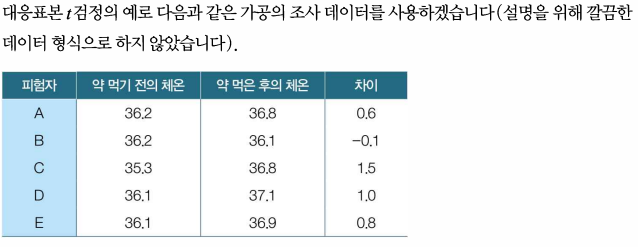

In [122]:
Image("img/t_validation_data.png")

### 분석 준비

In [120]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3

%matplotlib inline

In [124]:
paired_test_data = pd.read_csv("dataset/3-9-1-paired-t-test.csv")
print(paired_test_data)

  person medicine  body_temperature
0      A   before              36.2
1      B   before              36.2
2      C   before              35.3
3      D   before              36.1
4      E   before              36.1
5      A    after              36.8
6      B    after              36.1
7      C    after              36.8
8      D    after              37.1
9      E    after              36.9


귀무가설 : 약을 먹기 전과 후의 체온이 변하지 않는다.
    
대립가설 : 약을 먹기 전과 후의 체온이 다르다.

### 대응표본 t검정(실습)

#### 약을 먹기 전과 후의 표본평균

In [125]:
before = paired_test_data.query(
    'medicine == "before"')["body_temperature"]
after = paired_test_data.query(
    'medicine == "after"')["body_temperature"]

#### 배열형으로 변환

In [126]:
before = np.array(before)
after = np.array(after)

#### 차이 계산

In [127]:
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [128]:
stats.ttest_1samp(diff, 0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [129]:
stats.ttest_rel(after, before)

Ttest_relResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

### 독립표본 t검정 (실습)

#### 평균값

In [130]:
mean_bef = sp.mean(before)
mean_aft = sp.mean(after)

<ipython-input-130-655917715c41>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_bef = sp.mean(before)
<ipython-input-130-655917715c41>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_aft = sp.mean(after)


#### 분산

In [131]:
sigma_bef = sp.var(before, ddof = 1)
sigma_aft = sp.var(after, ddof = 1)

<ipython-input-131-3922b32b7dce>:1: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sigma_bef = sp.var(before, ddof = 1)
<ipython-input-131-3922b32b7dce>:2: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sigma_aft = sp.var(after, ddof = 1)


#### 샘플사이즈

In [133]:
m = len(before)
n = len(after)

#### t값

In [134]:
t_value = (mean_aft - mean_bef) / \
    sp.sqrt((sigma_bef/m + sigma_aft/n))
t_value

<ipython-input-134-19b5b4007ea7>:2: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sp.sqrt((sigma_bef/m + sigma_aft/n))


3.1557282344421034

In [135]:
stats.ttest_ind(after, before, equal_var = False)

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

### ** 분석가라면 다른것들은 아무렇게나 대한다고 하더라도 최소 한가지, 데이터만큼은 성실하게 대해야함!

## 분할표 검정

### p값 계산

In [136]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3

%matplotlib inline

In [137]:
1-sp.stats.chi2.cdf(x=6.667,df = 1)

0.009821437357809604

### 분할표 검정 (실습)

In [139]:
click_data = pd.read_csv("dataset/3-10-1-click_data.csv")
click_data

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [140]:
cross = pd.pivot_table(
    data = click_data,
    values = "freq",
    aggfunc = "sum",
    index = "color",
    columns = "click"
)
cross

click,click,not
color,,
blue,20,230
red,10,40


In [141]:
sp.stats.chi2_contingency(cross, correction = False)

(6.666666666666666,
 0.009823274507519247,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))